## TP4 2024 - REGIÓN GBA.

## Base de datos del TP

In [1]:
!pip install pandas pyreadstat

In [2]:
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
import pandas as pd

ruta2 = r"C:\Users\martz\Desktop\usu_individual_T124.xlsx"
df2 = pd.read_excel(ruta2)
df2.head()


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610


In [6]:
# Filtramos por región igual a 'Gran Buenos Aires'
df2_gba = df2[df2['REGION'] == 1]

# Vemos las primeras filas del nuevo DataFrame filtrado
df2_gba.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
245,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,1,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
246,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,2,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
247,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,3,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
255,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1,1,1,1,S,33,2368,...,NaN,6,500000.0,9,NaN,9,9.0,NaN,9,3324
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1,1,1,1,S,33,1223,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [11]:
# Ponemos todos los nombres de categorias en minúsculas

df2_gba.columns = df2_gba.columns.str.lower()
df2_gba.columns

Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'pondih'],
      dtype='object', length=177)

In [13]:
# Homogeneizamos las bases


# ch03: Parentesco
df2_gba['ch03'] = df2_gba['ch03'].replace({
    1: 'Jefe/a',
    2: 'Cónyuge/pareja',
    3: 'Hijo / hijastro/a',
    4: 'Yerno / nuera',
    5: 'Nieto/a',
    6: 'Madre / padre',
    7: 'Suegro/a',
    8: 'Hermano/a',
    9: 'Otros familiares',
    10: 'No familiares'
})

# ch04: Sexo
df2_gba['ch04'] = df2_gba['ch04'].replace({
    1: 'Varón',
    2: 'Mujer'
})

# ch10: Asistencia escolar
df2_gba['ch10'] = df2_gba['ch10'].replace({
    1: 'Sí, asiste',
    2: 'No asiste, pero asistió',
    3: 'Nunca asistió'
})

# ch12: Nivel educativo
df2_gba['ch12'] = df2_gba['ch12'].replace({
    1: 'Jardín/preescolar',
    2: 'Primario',
    3: 'EGB',
    4: 'Secundario',
    5: 'Polimodal',
    6: 'Terciario',
    7: 'Universitario',
    8: 'Posgrado universitario',
    9: 'Educación especial (discapacitado)'
})

# ch13: Alfabetización
df2_gba['ch13'] = df2_gba['ch13'].replace({
    1: 'Sí',
    2: 'No',
    3: 'Ns/Nr'
})

# ch14: Año o grado
df2_gba['ch14'] = df2_gba['ch14'].replace({
    0: 'Ninguno',
    1: 'Primero',
    2: 'Segundo',
    3: 'Tercero',
    4: 'Cuarto',
    5: 'Quinto',
    6: 'Sexto',
    7: 'Séptimo',
    8: 'Octavo',
    9: 'Noveno',
    98: 'Educación especial',
    99: 'Ns/Nr'
})

# estado: Condición de actividad
df2_gba['estado'] = df2_gba['estado'].replace({
    0: 'Entrevista individual no realizada (no respuesta al cuestionario individual)',
    1: 'Ocupado',
    2: 'Desocupado',
    3: 'Inactivo',
    4: 'Menor de 10 años'
})


C:\Users\martz\AppData\Local\Temp\ipykernel_22980\1267702465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['ch03'] = df2_gba['ch03'].replace({
C:\Users\martz\AppData\Local\Temp\ipykernel_22980\1267702465.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['ch04'] = df2_gba['ch04'].replace({
C:\Users\martz\AppData\Local\Temp\ipykernel_22980\1267702465.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [15]:
# Seleccionamos solo las columnas que queremos 
columns_to_keep = ['ano4', 'mas_500', 'ch03', 'ch04', 'ch06', 'ch10', 'ch12', 
                   'ch13', 'ch14', 'estado','p21', 'cat_ocup', 'pp03d']

# Aseguramos que ambas bases tengan solo las columnas necesarias
df2_filtered = df2_gba[columns_to_keep]

In [17]:
# Vemos los datos de la variable 'estado' en 2024
estado_data24 = df2_filtered['estado']

# Mostramos los datos
estado_data24.value_counts()

estado
Ocupado                                                                         3224
Inactivo                                                                        2662
Menor de 10 años                                                                 813
Desocupado                                                                       311
Entrevista individual no realizada (no respuesta al cuestionario individual)      41
Name: count, dtype: int64

In [19]:
# Creamos bases para los que respondieron en 2024
respondieron24 = df2_filtered[df2_filtered['estado'] != 'Entrevista individual no realizada (no respuesta al cuestion']
respondieron24.head(5)

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,ch13,ch14,estado,p21,cat_ocup,pp03d
245,2024,S,Jefe/a,Mujer,85,"No asiste, pero asistió",Primario,Sí,NaN,Ocupado,400000,2,0.0
246,2024,S,Hijo / hijastro/a,Varón,59,"No asiste, pero asistió",Universitario,Sí,NaN,Ocupado,-9,2,0.0
247,2024,S,Yerno / nuera,Mujer,57,"No asiste, pero asistió",Universitario,Sí,NaN,Ocupado,-9,3,0.0
255,2024,S,Jefe/a,Varón,26,"No asiste, pero asistió",Universitario,Sí,NaN,Ocupado,500000,1,0.0
256,2024,S,Jefe/a,Mujer,88,"No asiste, pero asistió",Primario,No,Segundo,Inactivo,0,0,NaN


In [21]:
# Incluye los valores válidos y mantiene los ceros
respondieron24 = respondieron24[~(respondieron24['p21'] < 0)].copy()

# Calculamos el salario semanal en 2024
respondieron24['salario_semanal'] = respondieron24['p21'] / 40
respondieron24.head(5)

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,ch13,ch14,estado,p21,cat_ocup,pp03d,salario_semanal
245,2024,S,Jefe/a,Mujer,85,"No asiste, pero asistió",Primario,Sí,NaN,Ocupado,400000,2,0.0,10000.0
255,2024,S,Jefe/a,Varón,26,"No asiste, pero asistió",Universitario,Sí,NaN,Ocupado,500000,1,0.0,12500.0
256,2024,S,Jefe/a,Mujer,88,"No asiste, pero asistió",Primario,No,Segundo,Inactivo,0,0,NaN,0.0
273,2024,S,Jefe/a,Varón,66,"No asiste, pero asistió",Universitario,Sí,NaN,Ocupado,800000,1,0.0,20000.0
277,2024,S,Hijo / hijastro/a,Varón,10,"Sí, asiste",Primario,No,Segundo,Inactivo,0,0,NaN,0.0


In [23]:
respondieron24 = respondieron24.copy()
respondieron24['ch06'] = pd.to_numeric(respondieron24['ch06'], errors='coerce')
respondieron24['edad2'] = respondieron24['ch06'] ** 2
respondieron24['edad2']


245      7225
255       676
256      7744
273      4356
277       100
         ... 
46045    1849
46046     441
46047     400
46048     121
46049     576
Name: edad2, Length: 6105, dtype: int64

In [25]:
# Diccionario base: años de educación si el nivel está COMPLETO
educacion_completa = {
    "Jardín/preescolar": 0,
    "Primario": 7,
    "EGB": 7,
    "Secundario": 13,       # 7 (primaria) + 6 (secundaria)
    "Polimodal": 13,        # Igual que secundario
    "Terciario": 16,        # 13 + 3
    "Universitario": 18,    # 13 + 5
    "Posgrado universitario": 20,  # 18 + 2
    "Educación especial (discapacitado)": np.nan
}

# Diccionario: cantidad de años aprobados si NO finalizó el nivel
anios_aprobados = {
    "Ninguno": 0,
    "Primero": 1,
    "Segundo": 2,
    "Tercero": 3,
    "Cuarto": 4,
    "Quinto": 5,
    "Sexto": 6,
    "Séptimo": 7,
    "Octavo": 8,
    "Noveno": 9,
    "Educación especial": np.nan,
    "Ns/Nr": np.nan
}

# Función para calcular los años de educación
def calcular_educ(row):
    nivel = row['ch12']
    finalizo = row['ch13']
    ultimo_anio = row['ch14']
    
    if nivel not in educacion_completa:
        return np.nan
    
    if finalizo == "Sí":
        return educacion_completa[nivel]
    else:
        if nivel in ["Primario", "EGB"]:
            base = 0
        elif nivel in ["Secundario", "Polimodal"]:
            base = 7
        elif nivel in ["Terciario", "Universitario"]:
            base = 13
        elif nivel == "Posgrado universitario":
            base = 18
        else:
            base = 0
        
        return base + anios_aprobados.get(ultimo_anio, np.nan)


respondieron24 = respondieron24.copy()

# Aplicamos la función
respondieron24['educ'] = respondieron24.apply(calcular_educ, axis=1)

# Mostramos la nueva variable (opcional)
respondieron24[['ch12', 'ch13', 'ch14', 'educ']].head(20)

,ch12,ch13,ch14,educ
245,Primario,Sí,NaN,7.0
255,Universitario,Sí,NaN,18.0
256,Primario,No,Segundo,2.0
273,Universitario,Sí,NaN,18.0
277,Primario,No,Segundo,2.0
278,Jardín/preescolar,No,Ninguno,0.0
399,Primario,Sí,NaN,7.0
400,Universitario,Sí,NaN,18.0
401,Universitario,No,Segundo,15.0
402,Primario,Sí,NaN,7.0


In [27]:
conteo_estado = respondieron24['estado'].value_counts()

print(conteo_estado)

estado
Inactivo                                                                        2662
Ocupado                                                                         2278
Menor de 10 años                                                                 813
Desocupado                                                                       311
Entrevista individual no realizada (no respuesta al cuestionario individual)      41
Name: count, dtype: int64


# Ejercicio A. Enfoque de validación

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [31]:
# Cambiamos el formato a la salida 
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Inspección rápida de las variables y sus valores
respondieron24.describe()

,ano4,ch06,p21,cat_ocup,pp03d,salario_semanal,edad2,educ
count,6105.00,6105.00,6105.00,6105.00,2278.00,6105.00,6105.00,5749.00
mean,2024.00,37.00,139077.17,1.14,0.23,3476.93,1935.20,10.61
std,0.00,23.79,328949.71,1.39,0.74,8223.74,2024.80,5.05
min,2024.00,-1.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,2024.00,16.00,0.00,0.00,0.00,0.00,256.00,7.00
50%,2024.00,34.00,0.00,0.00,0.00,0.00,1156.00,13.00
75%,2024.00,56.00,200000.00,3.00,0.00,5000.00,3136.00,14.00
max,2024.00,97.00,8000000.00,4.00,9.00,200000.00,9409.00,21.00


In [33]:
# Crear la dummy 'estado_desocupado'
respondieron24['estado_desocupado'] = (respondieron24['estado'] == 'Desocupado').astype(int)
# Crear la dummy 'estado_ocupado'
respondieron24['estado_ocupado'] = (respondieron24['estado'] == 'Ocupado').astype(int)

# Verificamos cantidad de casos
print("Desocupados:", respondieron24['estado_desocupado'].sum())
print("Ocupados:", respondieron24['estado_ocupado'].sum())

Desocupados: 311
Ocupados: 2278


In [35]:
# Lista de variables categóricas para crear dummies
vars_categoricas = ['ch03', 'ch04', 'ch10', 'ch12', 'ch13']

# Generamos las dummies
respondieron24_dummies = pd.get_dummies(respondieron24, columns=vars_categoricas, prefix=vars_categoricas, drop_first=False)

# Identificamos las columnas nuevas
cols_dummies = [col for col in respondieron24_dummies.columns if any(col.startswith(var + '_') for var in vars_categoricas)]

# Convertimos solo esas columnas a enteros
respondieron24_dummies[cols_dummies] = respondieron24_dummies[cols_dummies].astype(int)

# Mostramos las primeras filas para verificar
respondieron24_dummies.head()

,ano4,mas_500,ch06,ch14,estado,p21,cat_ocup,pp03d,salario_semanal,edad2,...,ch12_Polimodal,ch12_Posgrado universitario,ch12_Primario,ch12_Secundario,ch12_Terciario,ch12_Universitario,ch13_0,ch13_9,ch13_No,ch13_Sí
245,2024,S,85,NaN,Ocupado,400000,2,0.00,10000.00,7225,...,0,0,1,0,0,0,0,0,0,1
255,2024,S,26,NaN,Ocupado,500000,1,0.00,12500.00,676,...,0,0,0,0,0,1,0,0,0,1
256,2024,S,88,Segundo,Inactivo,0,0,NaN,0.00,7744,...,0,0,1,0,0,0,0,0,1,0
273,2024,S,66,NaN,Ocupado,800000,1,0.00,20000.00,4356,...,0,0,0,0,0,1,0,0,0,1
277,2024,S,10,Segundo,Inactivo,0,0,NaN,0.00,100,...,0,0,1,0,0,0,0,0,1,0


In [142]:
# Lista corregida de columnas que existen en el DataFrame
columnas_deseadas = [
    'ch06', 'salario_semanal', 'edad2', 'educ',
    'ch03_Jefe/a', 'ch03_Cónyuge/pareja', 'ch03_Hijo / hijastro/a', 'ch03_Yerno / nuera',
    'ch03_Nieto/a', 'ch03_Madre / padre', 'ch03_Suegro/a', 'ch03_Hermano/a',
    'ch03_Otros familiares', 'ch03_No familiares',
    'ch04_Varón', 'ch04_Mujer',
    'ch10_Sí, asiste', 'ch10_No asiste, pero asistió', 'ch10_Nunca asistió',
    'ch12_Jardín/preescolar', 'ch12_Primario', 'ch12_EGB', 'ch12_Secundario', 'ch12_Polimodal',
    'ch12_Terciario', 'ch12_Universitario', 'ch12_Posgrado universitario',
    'ch12_Educación especial (discapacitado)',
    'ch13_Sí', 'ch13_No',
    'estado_desocupado', 'estado_ocupado'
]

# Creamos la nueva base con solo esas columnas
respondieron24_f = respondieron24_dummies[columnas_deseadas].copy()

# Mostramos las primeras filas para verificar
respondieron24_f.head()


,ch06,salario_semanal,edad2,educ,ch03_Jefe/a,ch03_Cónyuge/pareja,ch03_Hijo / hijastro/a,ch03_Yerno / nuera,ch03_Nieto/a,ch03_Madre / padre,...,ch12_Secundario,ch12_Polimodal,ch12_Terciario,ch12_Universitario,ch12_Posgrado universitario,ch12_Educación especial (discapacitado),ch13_Sí,ch13_No,estado_desocupado,estado_ocupado
245,85,10000.00,7225,7.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
255,26,12500.00,676,18.00,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
256,88,0.00,7744,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
273,66,20000.00,4356,18.00,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
277,10,0.00,100,2.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [144]:
#Sacamos las filas que tienen NaN para poder ajustar el modelo

respondieron24_f = respondieron24_f.dropna()

In [146]:
# Variable dependiente
y24 = respondieron24_f['estado_desocupado']

# Todas las columnas menos la variable dependiente
X24 = respondieron24_f.drop(columns='estado_desocupado')


In [148]:
# División de la base 2024
X24_train, X24_test, y24_train, y24_test = train_test_split(
    X24, y24,
    test_size=0.3,           # 30% para test, 70% para entrenamiento
    random_state=444         # semilla para reproducibilidad
)


In [150]:
# Instanciamos el modelo
modelo24_logit = LogisticRegression(max_iter=1000)  

# Ajustamos el modelo con los datos de entrenamiento
modelo24_logit.fit(X24_train, y24_train)

C:\Users\martz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [152]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)

# Predicciones
y24_pred = modelo24_logit.predict(X24_test)
y24_proba = modelo24_logit.predict_proba(X24_test)[:, 1] 

# Métricas básicas con 3 decimales
print("Accuracy:", round(accuracy_score(y24_test, y24_pred), 3))
print("Precision:", round(precision_score(y24_test, y24_pred), 3))
print("Recall:", round(recall_score(y24_test, y24_pred), 3))
print("F1-score:", round(f1_score(y24_test, y24_pred), 3))
print("ROC AUC:", round(roc_auc_score(y24_test, y24_proba), 3))



Accuracy: 0.949
Precision: 0.435
Recall: 0.118
F1-score: 0.185
ROC AUC: 0.923



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1640
           1       0.43      0.12      0.19        85

    accuracy                           0.95      1725
   macro avg       0.70      0.55      0.58      1725
weighted avg       0.93      0.95      0.93      1725



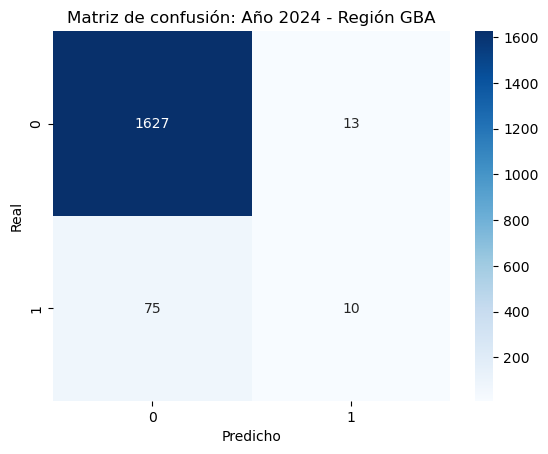

In [154]:
# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y24_test, y24_pred))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

cm24 = confusion_matrix(y24_test, y24_pred)
sns.heatmap(cm24, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión: Año 2024 - Región GBA")
plt.show()


In [51]:
# Mostramos los coeficientes con sus nombres
coeficientes24 = pd.Series(modelo24_logit.coef_[0], index=X24.columns)
coeficientes24.sort_values(ascending=False)

ch03_Jefe/a                                0.40
ch03_Yerno / nuera                         0.39
ch06                                       0.26
ch12_Universitario                         0.16
ch12_Terciario                             0.08
ch03_Hermano/a                             0.07
educ                                       0.04
ch10_Nunca asistió                         0.00
ch12_Educación especial (discapacitado)    0.00
edad2                                     -0.00
ch03_Hijo / hijastro/a                    -0.01
ch12_Posgrado universitario               -0.02
ch12_Secundario                           -0.05
salario_semanal                           -0.07
ch03_Nieto/a                              -0.07
ch03_Suegro/a                             -0.13
ch12_Polimodal                            -0.20
ch12_Primario                             -0.25
ch10_No asiste, pero asistió              -0.34
ch03_Otros familiares                     -0.46
ch03_Madre / padre                      

In [53]:
# Creamos variable dependiente: 1 si está desocupado, 0 en caso contrario
respondieron24['desocupado'] = (respondieron24['estado'] == 'Desocupado').astype(int)

# Seleccionamos variables independientes: todas menos 'estado' y 'desocupado'
X24 = respondieron24.drop(columns=['estado', 'desocupado'])
y24 = respondieron24['desocupado']

# Dividimos la muestra: 70% entrenamiento, 30% prueba — semilla 444
X24_train, X24_test, y24_train, y24_test = train_test_split(X24, y24, 
                                                    test_size=0.3, 
                                                    random_state=444)


print(f"X24_train: {X24_train.shape}, X24_test: {X24_test.shape}")
print(f"y24_train: {y24_train.shape}, y24_test: {y24_test.shape}")

X24_train: (4273, 17), X24_test: (1832, 17)
y24_train: (4273,), y24_test: (1832,)


In [55]:
# Calculamos las medias en cada conjunto
mean_train24 = X24_train.mean(numeric_only=True)
mean_test24 = X24_test.mean(numeric_only=True)

# Calculamos la diferencia de medias
diff_means24 = mean_train24 - mean_test24

# Creamos un DataFrame con los resultados
tabla_dif_medias24 = pd.DataFrame({
    'Media Train': mean_train24,
    'Media Test': mean_test24,
    'Diferencia': diff_means24
})


tabla_dif_medias24

,Media Train,Media Test,Diferencia
ano4,2024.00,2024.00,0.00
ch06,37.04,36.90,0.14
p21,140602.39,135519.71,5082.68
cat_ocup,1.13,1.15,-0.01
pp03d,0.24,0.23,0.01
salario_semanal,3515.06,3387.99,127.07
edad2,1934.72,1936.32,-1.60
educ,10.64,10.54,0.10
estado_desocupado,0.05,0.05,-0.00
estado_ocupado,0.37,0.38,-0.01


# Ejercicio B.	Metodo Supervisado 1: Modelo de Regresión Lineal

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [60]:
# Creamos la dummy de cat_ocup que usaremos en el punto V
respondieron24['cat_ocup_obrero_empleado'] = (respondieron24['cat_ocup'] == 'Obrero o empleado').astype(int)

# Extraemos las columnas relevantes
extras = respondieron24[['pp03d', 'cat_ocup_obrero_empleado']]

# Añadimos estas columnas a respondieron4_f
respondieron24_f[['pp03d', 'cat_ocup_obrero_empleado']] = extras


In [62]:
# Filtramos solo ocupados 
ocupados24 = respondieron24_f[respondieron24_f['estado_ocupado'] == 1]

## I.'salario_semanal' con 'ch06' (edad) año 2024

In [65]:
# Seleccionamos variables
x24b = ocupados24['ch06'].values.reshape(-1, 1)  # Predictor
y24b = ocupados24['salario_semanal'].values      # Variable dependiente

In [67]:
# Dividimos datos en entrenamiento y prueba (70% train, 30% test)
x24b_train, x24b_test, y24b_train, y24b_test = train_test_split(x24b, y24b, test_size=0.3, random_state=444)

# Ajustamos el modelo con los datos de entrenamiento
model24b = LinearRegression().fit(x24b_train, y24b_train)

In [69]:
# Resultados del modelo
intercepto = model24b.intercept_
pendiente = model24b.coef_[0]

print('\nIntercepto:', round(intercepto,3))
print('Pendiente:', round(pendiente,3))


Intercepto: 7059.022
Pendiente: 53.185


In [71]:
# Predicciones en el set de test
y24b_pred = model24b.predict(x24b_test)

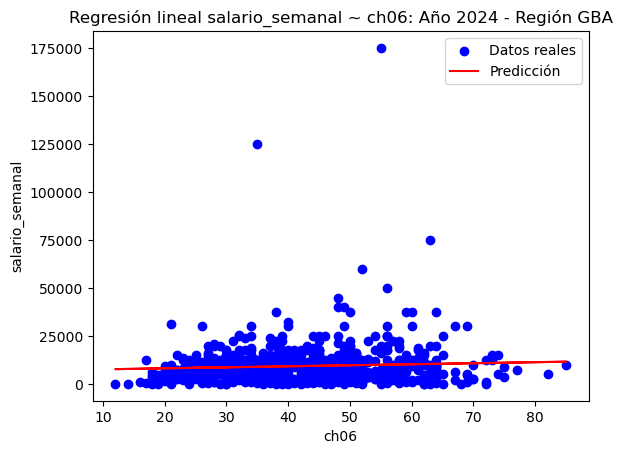

In [186]:
# Plot (scatter y línea de regresión)
plt.scatter(x24b_test, y24b_test, color='blue', label='Datos reales')
plt.plot(x24b_test, y24b_pred, color='red', label='Predicción')
plt.xlabel('ch06')
plt.ylabel('salario_semanal')
plt.title('Regresión lineal salario_semanal ~ ch06: Año 2024 - Región GBA')
plt.legend()
plt.show()


In [75]:
# Métricas
r2_24b_train = model24b.score(x24b_train, y24b_train)
r2_24b_test = r2_score(y24b_test, y24b_pred)

print('\nR2 en entrenamiento:', round(r2_24b_train,3))
print('R2 en test:', round(r2_24b_test,3))


R2 en entrenamiento: 0.004
R2 en test: 0.012


## II.'salario_semanal' con 'ch06' y 'edad2' (edad y edad al cuadrado) año 2024

In [78]:
# Seleccionamos variables
X24c = ocupados24[['ch06', 'edad2']].values      # Predictoras
y24c = ocupados24['salario_semanal'].values      # Variable dependiente

In [80]:
# División de los datos en entrenamiento y prueba (70%-30%)
X24c_train, X24c_test, y24c_train, y24c_test = train_test_split(X24c, y24c, test_size=0.3, random_state=444)

# Ajustamos el modelo lineal
model24c = LinearRegression().fit(X24c_train, y24c_train)


In [82]:
# Resultados del modelo
intercepto = model24c.intercept_
pendientes = model24c.coef_

print('\nIntercepto:', round(intercepto,3))
print('Pendientes:')
print('  ch06:', round(pendientes[0],3))
print('  edad2:', round(pendientes[1],3))



Intercepto: -4706.168
Pendientes:
  ch06: 646.248
  edad2: -6.709


In [84]:
# Predicciones sobre el set de test
y24c_pred = model24c.predict(X24c_test)

In [86]:
# Métricas de desempeño
r2_24c_train = model24c.score(X24c_train, y24c_train)
r2_24c_test = r2_score(y24c_test, y24c_pred)

print('\nR2 en entrenamiento:', round(r2_24c_train,3))
print('R2 en test:', round(r2_24c_test,3))


R2 en entrenamiento: 0.023
R2 en test: 0.022


## III.'salario_semanal' con 'ch06', 'edad2' y 'educ' (edad, edad al cuadrado y educación) año 2024

In [89]:
# Seleccionamos las variables
X24d = ocupados24[['ch06', 'edad2', 'educ']].values  # Predictoras
y24d = ocupados24['salario_semanal'].values          # Variable dependiente

In [91]:
# División en entrenamiento y prueba (70%-30%)
X24d_train, X24d_test, y24d_train, y24d_test = train_test_split(X24d, y24d, test_size=0.3, random_state=444)

# Ajuste del modelo
model24d = LinearRegression().fit(X24d_train, y24d_train)

In [93]:
# Resultados del modelo
intercepto = model24d.intercept_
pendientes = model24d.coef_

print('\nIntercepto:', round(intercepto,3))
print('Pendientes:')
print('  ch06:', round(pendientes[0],3))
print('  edad2:', round(pendientes[1],3))
print('  educ:', round(pendientes[2],3))


Intercepto: -15897.56
Pendientes:
  ch06: 617.487
  edad2: -6.168
  educ: 863.312


In [95]:
# Predicciones sobre el set de test
y24d_pred = model24d.predict(X24d_test)

In [97]:
# Métricas de desempeño
r2_24d_train = model24d.score(X24d_train, y24d_train)
r2_24d_test = r2_score(y24d_test, y24d_pred)

print('\nR2 en entrenamiento:', round(r2_24d_train,3))
print('R2 en test:', round(r2_24d_test,3))


R2 en entrenamiento: 0.104
R2 en test: 0.085


## IV.'salario_semanal' con 'ch06', 'edad2', 'educ' y 'ch04_Mujer' (edad, edad al cuadrado, educación y género) año 2024

In [100]:
# Selección de variables
X24e = ocupados24[['ch06', 'edad2', 'educ', 'ch04_Mujer']].values  # Predictoras
y24e = ocupados24['salario_semanal'].values                        # Variable dependiente


In [102]:
# División en conjunto de entrenamiento y test (70% - 30%)
X24e_train, X24e_test, y24e_train, y24e_test = train_test_split(X24e, y24e, test_size=0.3, random_state=444)

# Ajuste del modelo
model24e = LinearRegression().fit(X24e_train, y24e_train)

In [104]:
# Resultados
intercepto = model24e.intercept_
pendientes = model24e.coef_

print('\nIntercepto:', round(intercepto,3))
print('Pendientes:')
print('  ch06:', round(pendientes[0],3))
print('  edad2:', round(pendientes[1],3))
print('  educ:', round(pendientes[2],3))
print('  ch04_Mujer:', round(pendientes[3],3))


Intercepto: -15537.026
Pendientes:
  ch06: 652.079
  edad2: -6.554
  educ: 938.651
  ch04_Mujer: -4306.048


In [106]:
# Predicciones sobre el set de test
y24e_pred = model24e.predict(X24e_test)


In [108]:
# Métricas R2
r2_24e_train = model24e.score(X24e_train, y24e_train)
r2_24e_test = r2_score(y24e_test, y24e_pred)

print('\nR2 en entrenamiento:', round(r2_24e_train,3))
print('R2 en test:', round(r2_24e_test,3))


R2 en entrenamiento: 0.139
R2 en test: 0.114


## IV.'salario_semanal' con 'ch06', 'edad2', 'educ', 'ch04_Mujer', 'pp03d' y 'cat_ocup_obrero_empleado'  (edad, edad al cuadrado, educación, género, cuántas ocupaciones tiene y si es obrero/empleado) año 2024

In [111]:
# Selección de variables 
X24f = ocupados24[['ch06', 'edad2', 'educ', 'ch04_Mujer', 'pp03d', 'cat_ocup_obrero_empleado']].values # Predictoras
y24f = ocupados24['salario_semanal'].values  # Variable dependiente

In [113]:
# División en conjunto de entrenamiento y test (70% - 30%)
X24f_train, X24f_test, y24f_train, y24f_test = train_test_split(X24f, y24f, test_size=0.3, random_state=444)

# Ajuste del modelo
model24f = LinearRegression().fit(X24f_train, y24f_train)

In [115]:
# Resultados
intercepto = model24f.intercept_
pendientes = model24f.coef_

print('\nIntercepto:', round(intercepto,3))
print('Pendientes:')
print('  ch06:', round(pendientes[0],3))
print('  edad2:', round(pendientes[1],3))
print('  educ:', round(pendientes[2],3))
print('  ch04_Mujer:', round(pendientes[3],3))
print('  pp03d:', round(pendientes[4],3))
print('  cat_ocup_obrero_empleado:', round(pendientes[5],3))



Intercepto: -15683.616
Pendientes:
  ch06: 659.493
  edad2: -6.633
  educ: 942.847
  ch04_Mujer: -4262.548
  pp03d: -371.109
  cat_ocup_obrero_empleado: 0.0


In [117]:
# Predicciones sobre el set de test
y24f_pred = model24f.predict(X24f_test)


In [119]:
# Métricas R2
r2_24f_train = model24f.score(X24f_train, y24f_train)
r2_24f_test = r2_score(y24f_test, y24f_pred)

print('\nR2 en entrenamiento:', round(r2_24f_train,3))
print('R2 en test:', round(r2_24f_test,3))


R2 en entrenamiento: 0.14
R2 en test: 0.112


## Tabla 2. Estimación por regresión lineal de salarios usando la base de entrenamiento 


In [130]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Definimos las variables para cada modelo
variables_modelos = [
    ['ch06'],  # Modelo 1
    ['ch06', 'edad2'],  # Modelo 2
    ['ch06', 'edad2', 'educ'],  # Modelo 3
    ['ch06', 'edad2', 'educ', 'ch04_Mujer'],  # Modelo 4
    ['ch06', 'edad2', 'educ', 'ch04_Mujer', 'pp03d', 'cat_ocup_obrero_empleado']  # Modelo 5
]

# Nombres visibles de las variables
nombres_visibles = {
    'ch06': 'edad',
    'edad2': 'edad2',
    'educ': 'educ',
    'ch04_Mujer': 'Mujer',
    'pp03d': 'Variable 1',
    'cat_ocup_obrero_empleado': 'Variable 2'
}

# Guardamos resultados
modelos = []
columnas = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5']
index = list(nombres_visibles.values())
tabla = pd.DataFrame(index=index, columns=columnas)

# Recorremos cada modelo
for i, vars_modelo in enumerate(variables_modelos):
    X = ocupados24[vars_modelo]
    y = ocupados24['salario_semanal']

    # División en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)
    X_train_const = sm.add_constant(X_train)
    
    modelo = sm.OLS(y_train, X_train_const).fit()
    modelos.append(modelo)

    for var in nombres_visibles:
        if var in vars_modelo:
            coef = modelo.params[var]
            se = modelo.bse[var]
            pval = modelo.pvalues[var]

            # Significancia
            signif = ""
            if pval < 0.001:
                signif = "***"
            elif pval < 0.05:
                signif = "**"
            elif pval < 0.1:
                signif = "*"

            texto = f"{coef:.3f}{signif} ({se:.2f})"
            tabla.loc[nombres_visibles[var], columnas[i]] = texto
        else:
            tabla.loc[nombres_visibles[var], columnas[i]] = ""

# Agregar N y R2
tabla.loc["N (obs)"] = [int(model.nobs) for model in modelos]
tabla.loc["R²"] = [f"{model.rsquared:.3f}" for model in modelos]

# Mostrar tabla final
tabla
# Exportamos el DataFrame como archivo Excel
ocupados24.to_excel("ocupados_2024_TP4.xlsx", index=False)

## 3-) Performance por regresión lineal de la predicción de salarios usando la base de testeo.

In [132]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cargamos la base de ocupados del año 2024
df_2024 = pd.read_excel("ocupados_2024_TP4.xlsx")

# Definimos las variables para cada modelo
variables_modelos = [
    ['ch06'],  # Modelo 1
    ['ch06', 'edad2'],  # Modelo 2
    ['ch06', 'edad2', 'educ'],  # Modelo 3
    ['ch06', 'edad2', 'educ', 'ch04_Mujer'],  # Modelo 4
    ['ch06', 'edad2', 'educ', 'ch04_Mujer', 'pp03d', 'cat_ocup_obrero_empleado']  # Modelo 5
]

# Creamos un diccionario para guardar las métricas de cada modelo
resultados = {
    "Modelo": [],
    "MSE": [],
    "RMSE": [],
    "MAE": []
}

# Recorremos los modelos y calculamos métricas
for i, variables in enumerate(variables_modelos):
    df_modelo = df_2024[variables + ["salario_semanal"]].dropna()
    
    X = df_modelo[variables]
    y = df_modelo["salario_semanal"]
    X = sm.add_constant(X)

    # División en entrenamiento y testeo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

    # Ajustamos el modelo
    modelo = sm.OLS(y_train, X_train).fit()
    y_pred = modelo.predict(X_test)

    # Calculamos las métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Guardamos resultados
    resultados["Modelo"].append(f"Modelo {i+1}")
    resultados["MSE"].append(mse)
    resultados["RMSE"].append(rmse)
    resultados["MAE"].append(mae)

# Mostramos los resultados en una tabla
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

     Modelo          MSE     RMSE     MAE
0  Modelo 1 123681273.24 11121.21 6031.42
1  Modelo 2 122344203.25 11060.93 5953.20
2  Modelo 3 114457359.10 10698.47 5701.92
3  Modelo 4 110812054.96 10526.73 5497.65
4  Modelo 5 111153900.56 10542.96 5472.21


## 4-) Predicción de salarios en un gráfico de dispersión.

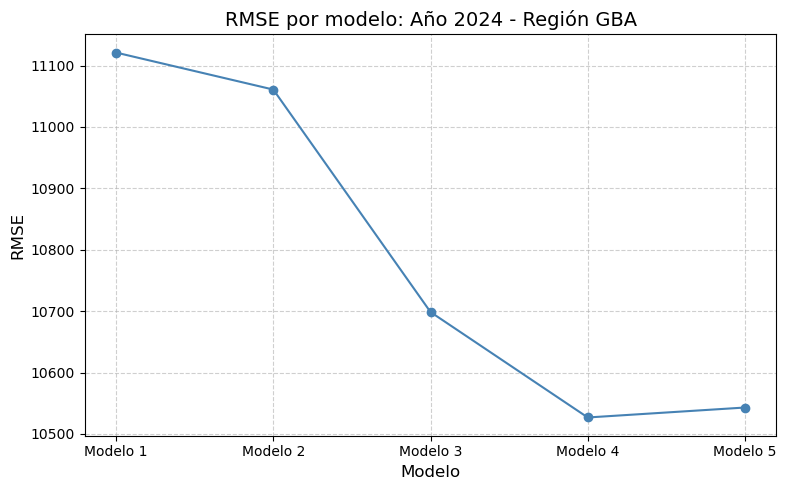

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

# Gráfico para 2024 
plt.figure(figsize=(8, 5))
plt.plot(df_resultados["Modelo"], df_resultados["RMSE"], marker='o', color='steelblue')
plt.title("RMSE por modelo: Año 2024 - Región GBA", fontsize=14)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### C. Métodos de Clasificación y Performance

### 5-) Regresión logistica (logit) y Vecinos cercanos (KNN)

In [131]:
#Convertimos a binario: 1 si está desocupado, 0 si no.
y_train_bin = (y_train > 0.5).astype(int)
y_test_bin = (y_test > 0.5).astype(int)


In [133]:
from sklearn.neighbors import KNeighborsClassifier

#Definir el modelo KNN con K=5.
knn_model = KNeighborsClassifier(n_neighbors=5)

#Entrenar el modelo.
knn_model.fit(X_train, y_train_bin)
knn_probs = knn_model.predict_proba(X_test)[:, 1]
knn_preds = (knn_probs > 0.5).astype(int)


In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Escalamos los datos.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entrenamos el modelo logístico.
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train_scaled, y_train_bin)

#Predicciones con datos escalados.
logit_probs = logit_model.predict_proba(X_test_scaled)[:, 1]
logit_preds = (logit_probs > 0.5).astype(int)

#Igual para KNN (también con datos escalados si es necesario).
knn_model.fit(X_train_scaled, y_train_bin)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
knn_preds = (knn_probs > 0.5).astype(int)


In [178]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, RocCurveDisplay
import matplotlib.pyplot as plt
#Ahora con esto podremos ver la precisión.
def evaluar_modelo(y_true, y_pred, y_prob, nombre):
    print(f"\n--- {nombre} ---")
    print("Matriz de confusión:")
    print(confusion_matrix(y_true, y_pred))
    
    acc = accuracy_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=nombre).plot()
    plt.title(f"ROC Curve - {nombre}: Año 2024 - Región GBA")
    plt.show()



--- Regresión Logística ---
Matriz de confusión:
[[  0  25]
 [  0 649]]
Accuracy: 0.9629
AUC: 0.6087


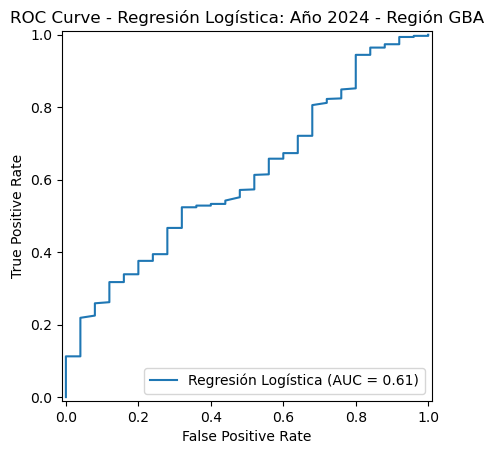


--- KNN (K=5) ---
Matriz de confusión:
[[  0  25]
 [  1 648]]
Accuracy: 0.9614
AUC: 0.5359


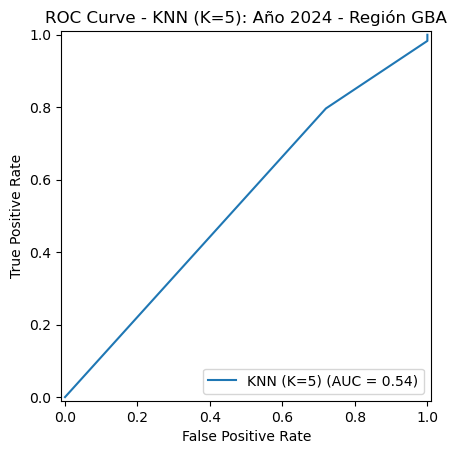

In [180]:
evaluar_modelo(y_test_bin, logit_preds, logit_probs, "Regresión Logística")
evaluar_modelo(y_test_bin, knn_preds, knn_probs, "KNN (K=5)")


### 6-) Personas que son desocupadas dentro de la base norespondieron.

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Preparación del Modelo de Regresión Logística.
# Definir las características (columnas X) y la variable objetivo (y).
# Estas características son las seleccionadas en su cuaderno, excluyendo 'estado'.
features = ['ano4', 'mas_500', 'ch03', 'ch04', 'ch06', 'ch10', 'ch12', 'ch13', 'ch14', 'p21', 'cat_ocup', 'pp03d']

# Separar características numéricas y categóricas
numerical_features = ['ano4', 'mas_500', 'ch06', 'p21', 'pp03d']
categorical_features = ['ch03', 'ch04', 'ch10', 'ch12', 'ch13', 'ch14', 'cat_ocup']

# Crear el conjunto de datos de entrenamiento (excluyendo 'Entrevista individual no realizada')
df_train_model = df2_gba[df2_gba['estado'] != 'Entrevista individual no realizada'].copy()

# Binarizar la variable objetivo 'estado': 'Desocupado' = 1, otras = 0
df_train_model['target'] = df_train_model['estado'].apply(lambda x: 1 if x == 'Desocupado' else 0)

# Separar X (features) e y (target) para el entrenamiento
X_train_data = df_train_model[features]
y_train_target = df_train_model['target']

# Aplicar One-Hot Encoding a las características categóricas
X_train_encoded = pd.get_dummies(X_train_data, columns=categorical_features, drop_first=True)

# Ajustar y transformar las características numéricas con StandardScaler
scaler = StandardScaler()
X_train_encoded[numerical_features] = scaler.fit_transform(X_train_encoded[numerical_features])

logit_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000, class_weight='balanced')
logit_model.fit(X_train_encoded, y_train_target)


#Identificación de la base 'norespondieron'
norespondieron = df2_gba[df2_gba['estado'] == 'Entrevista individual no realizada'].copy()

X_norespondieron = norespondieron[features].copy()

X_norespondieron_encoded = pd.get_dummies(X_norespondieron, columns=categorical_features, drop_first=True)

#Asegurarse de que las columnas coincidan con las del conjunto de entrenamiento.
missing_cols = set(X_train_encoded.columns) - set(X_norespondieron_encoded.columns)
for c in missing_cols:
    X_norespondieron_encoded[c] = 0
X_norespondieron_encoded = X_norespondieron_encoded[X_train_encoded.columns]

#Transformar las características numéricas usando el scaler ya ajustado.
X_norespondieron_encoded[numerical_features] = scaler.transform(X_norespondieron_encoded[numerical_features])

# El método .predict() devolverá 1 para 'Desocupado' y 0 para 'No Desocupado'.
predictions_desocupadas_norespondieron = logit_model.predict(X_norespondieron_encoded)

#Cálculo de la proporción
total_personas_norespondieron = len(norespondieron)
personas_predichas_desocupadas = np.sum(predictions_desocupadas_norespondieron == 1)

if total_personas_norespondieron > 0:
    proporcion_desocupadas = (personas_predichas_desocupadas / total_personas_norespondieron) * 100
else:
    proporcion_desocupadas = 0

print(f"Total de personas en la base 'norespondieron': {total_personas_norespondieron}")
print(f"Número de personas predichas como 'Desocupadas': {personas_predichas_desocupadas}")
print(f"Proporción de personas predichas como 'Desocupadas' en 'norespondieron': {proporcion_desocupadas:.2f}%")

Total de personas en la base 'norespondieron': 101
Número de personas predichas como 'Desocupadas': 41
Proporción de personas predichas como 'Desocupadas' en 'norespondieron': 40.59%
